# Import Libraries

In [14]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from model import S8_model
from utils import get_incorrrect_predictions , plot_incorrect_predictions

## Data Transformations




In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                       transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       #transforms.RandomRotation((-7.0, 7.0), fill=(3,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
                                       #transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                       #transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
                                       #transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [3]:
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
class_map = {
 'airplane' : 0,
 'automobile' : 1,
 'bird': 2,
 'cat' : 3,
 'deer' : 4,
 'dog' : 5,
 'frog' : 6,
 'horse' : 7,
 'ship' : 8,
 'truck' : 9
}

# Dataloader Arguments & Test/Train Dataloaders


In [6]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=64, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Model Params


In [8]:
print( '+++++++++++++++++++++++ Parameters for Batch Normalization Model +++++++++++++++++++++++++++++++++++'  )
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = S8_model('BN').to(device)
summary(model, input_size=(3, 32, 32))

+++++++++++++++++++++++ Parameters for Batch Normalization Model +++++++++++++++++++++++++++++++++++
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             216
              ReLU-2            [-1, 8, 32, 32]               0
       BatchNorm2d-3            [-1, 8, 32, 32]              16
           Dropout-4            [-1, 8, 32, 32]               0
            Conv2d-5            [-1, 8, 32, 32]             576
              ReLU-6            [-1, 8, 32, 32]               0
       BatchNorm2d-7            [-1, 8, 32, 32]              16
           Dropout-8            [-1, 8, 32, 32]               0
            Conv2d-9            [-1, 7, 32, 32]              56
        MaxPool2d-10            [-1, 7, 16, 16]               0
           Conv2d-11      

In [9]:
print('+++++++++++++++++++++++ Parameters for Layer Normalization Model +++++++++++++++++++++++++++++++++++ ')
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = S8_model('LN').to(device)
summary(model, input_size=(3, 32, 32))

+++++++++++++++++++++++ Parameters for Layer Normalization Model +++++++++++++++++++++++++++++++++++ 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             216
              ReLU-2            [-1, 8, 32, 32]               0
         GroupNorm-3            [-1, 8, 32, 32]              16
           Dropout-4            [-1, 8, 32, 32]               0
            Conv2d-5            [-1, 8, 32, 32]             576
              ReLU-6            [-1, 8, 32, 32]               0
         GroupNorm-7            [-1, 8, 32, 32]              16
           Dropout-8            [-1, 8, 32, 32]               0
            Conv2d-9            [-1, 7, 32, 32]              56
        MaxPool2d-10            [-1, 7, 16, 16]               0
           Conv2d-11     

In [10]:
print('+++++++++++++++++++++++ Parameters for Layer Normalization Model +++++++++++++++++++++++++++++++++++ ')
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = S8_model('LN').to(device)
summary(model, input_size=(3, 32, 32))

+++++++++++++++++++++++ Parameters for Layer Normalization Model +++++++++++++++++++++++++++++++++++ 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             216
              ReLU-2            [-1, 8, 32, 32]               0
         GroupNorm-3            [-1, 8, 32, 32]              16
           Dropout-4            [-1, 8, 32, 32]               0
            Conv2d-5            [-1, 8, 32, 32]             576
              ReLU-6            [-1, 8, 32, 32]               0
         GroupNorm-7            [-1, 8, 32, 32]              16
           Dropout-8            [-1, 8, 32, 32]               0
            Conv2d-9            [-1, 7, 32, 32]              56
        MaxPool2d-10            [-1, 7, 16, 16]               0
           Conv2d-11     

# Training and Testing



Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs.

Let's write train and test functions

In [11]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes.
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm

    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    test_acc.append(100. * correct / len(test_loader.dataset))

++++++++++++++++++++++++++Batch Normalization Model +++++++++++++++++++++++++++++++++++++++++
EPOCH: 0


Loss=1.374416470527649 Batch_id=781 Accuracy=41.87: 100%|██████████| 782/782 [00:49<00:00, 15.71it/s]



Test set: Average loss: 1.4854, Accuracy: 4718/10000 (47.18%)

EPOCH: 1


Loss=1.73898184299469 Batch_id=781 Accuracy=55.16: 100%|██████████| 782/782 [00:51<00:00, 15.27it/s]



Test set: Average loss: 1.3330, Accuracy: 5428/10000 (54.28%)

EPOCH: 2


Loss=1.034288763999939 Batch_id=781 Accuracy=59.96: 100%|██████████| 782/782 [00:58<00:00, 13.34it/s]



Test set: Average loss: 1.0414, Accuracy: 6328/10000 (63.28%)

EPOCH: 3


Loss=1.2643343210220337 Batch_id=781 Accuracy=62.46: 100%|██████████| 782/782 [00:49<00:00, 15.65it/s]



Test set: Average loss: 1.0584, Accuracy: 6214/10000 (62.14%)

EPOCH: 4


Loss=1.20867121219635 Batch_id=781 Accuracy=64.22: 100%|██████████| 782/782 [00:51<00:00, 15.13it/s]



Test set: Average loss: 1.0817, Accuracy: 6187/10000 (61.87%)

EPOCH: 5


Loss=1.104572057723999 Batch_id=781 Accuracy=65.47: 100%|██████████| 782/782 [00:52<00:00, 14.83it/s]



Test set: Average loss: 1.0161, Accuracy: 6345/10000 (63.45%)

EPOCH: 6


Loss=0.8867225646972656 Batch_id=781 Accuracy=66.56: 100%|██████████| 782/782 [00:51<00:00, 15.22it/s]



Test set: Average loss: 0.9438, Accuracy: 6629/10000 (66.29%)

EPOCH: 7


Loss=1.2078449726104736 Batch_id=781 Accuracy=67.48: 100%|██████████| 782/782 [00:49<00:00, 15.82it/s]



Test set: Average loss: 0.9687, Accuracy: 6561/10000 (65.61%)

EPOCH: 8


Loss=0.6698276996612549 Batch_id=781 Accuracy=68.34: 100%|██████████| 782/782 [00:49<00:00, 15.74it/s]



Test set: Average loss: 0.9057, Accuracy: 6825/10000 (68.25%)

EPOCH: 9


Loss=1.3802868127822876 Batch_id=781 Accuracy=69.16: 100%|██████████| 782/782 [00:50<00:00, 15.51it/s]



Test set: Average loss: 0.9379, Accuracy: 6721/10000 (67.21%)

EPOCH: 10


Loss=1.2121397256851196 Batch_id=781 Accuracy=69.82: 100%|██████████| 782/782 [00:48<00:00, 16.04it/s]



Test set: Average loss: 0.8390, Accuracy: 7038/10000 (70.38%)

EPOCH: 11


Loss=0.8199015259742737 Batch_id=781 Accuracy=70.47: 100%|██████████| 782/782 [00:49<00:00, 15.89it/s]



Test set: Average loss: 0.8526, Accuracy: 7005/10000 (70.05%)

EPOCH: 12


Loss=0.6939976811408997 Batch_id=781 Accuracy=71.04: 100%|██████████| 782/782 [00:50<00:00, 15.48it/s]



Test set: Average loss: 0.8860, Accuracy: 6922/10000 (69.22%)

EPOCH: 13


Loss=0.6937751173973083 Batch_id=781 Accuracy=71.51: 100%|██████████| 782/782 [00:47<00:00, 16.53it/s]



Test set: Average loss: 0.8222, Accuracy: 7090/10000 (70.90%)

EPOCH: 14


Loss=0.8249399662017822 Batch_id=781 Accuracy=71.94: 100%|██████████| 782/782 [00:47<00:00, 16.50it/s]



Test set: Average loss: 0.8570, Accuracy: 7029/10000 (70.29%)

EPOCH: 15


Loss=0.8451091051101685 Batch_id=781 Accuracy=72.32: 100%|██████████| 782/782 [00:47<00:00, 16.42it/s]



Test set: Average loss: 0.7995, Accuracy: 7189/10000 (71.89%)

EPOCH: 16


Loss=0.5144017934799194 Batch_id=781 Accuracy=72.75: 100%|██████████| 782/782 [00:47<00:00, 16.54it/s]



Test set: Average loss: 0.7867, Accuracy: 7295/10000 (72.95%)

EPOCH: 17


Loss=0.6707388758659363 Batch_id=781 Accuracy=73.17: 100%|██████████| 782/782 [00:48<00:00, 16.13it/s]



Test set: Average loss: 0.7630, Accuracy: 7284/10000 (72.84%)

EPOCH: 18


Loss=0.8779723048210144 Batch_id=781 Accuracy=73.25: 100%|██████████| 782/782 [00:47<00:00, 16.59it/s]



Test set: Average loss: 0.8046, Accuracy: 7157/10000 (71.57%)

EPOCH: 19


Loss=0.534607470035553 Batch_id=781 Accuracy=73.61: 100%|██████████| 782/782 [00:48<00:00, 16.20it/s]



Test set: Average loss: 0.7799, Accuracy: 7322/10000 (73.22%)

++++++++++++++++++++++++++Misclassified Images Batch Normalization Model +++++++++++++++++++++++++++++++++++++++++


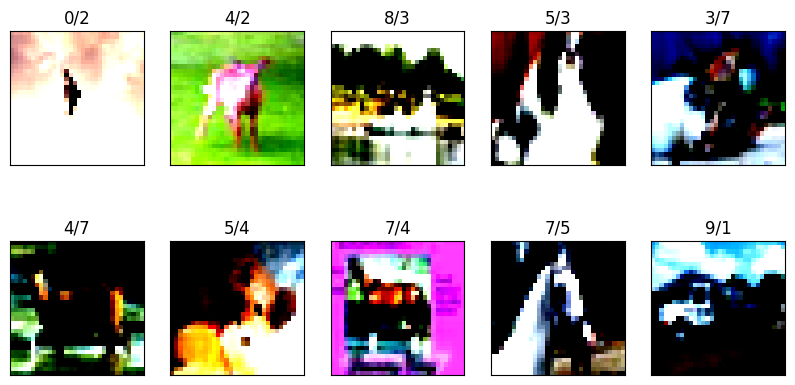

In [12]:
from torch.optim.lr_scheduler import StepLR
print('++++++++++++++++++++++++++Batch Normalization Model +++++++++++++++++++++++++++++++++++++++++')

model =  model = S8_model('BN').to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    # scheduler.step()
    test(model, device, test_loader)

print('++++++++++++++++++++++++++Misclassified Images Batch Normalization Model +++++++++++++++++++++++++++++++++++++++++')
incorrect = get_incorrrect_predictions(model, test_loader, device)
plot_incorrect_predictions(incorrect, class_map)

++++++++++++++++++++++++++  Layer Normalization Model +++++++++++++++++++++++++++++++++++++++++
EPOCH: 0


Loss=1.2134404182434082 Batch_id=781 Accuracy=36.08: 100%|██████████| 782/782 [00:47<00:00, 16.42it/s]



Test set: Average loss: 1.4448, Accuracy: 4698/10000 (46.98%)

EPOCH: 1


Loss=1.2354011535644531 Batch_id=781 Accuracy=49.24: 100%|██████████| 782/782 [00:47<00:00, 16.38it/s]



Test set: Average loss: 1.4261, Accuracy: 4791/10000 (47.91%)

EPOCH: 2


Loss=1.0401239395141602 Batch_id=781 Accuracy=55.57: 100%|██████████| 782/782 [00:48<00:00, 16.20it/s]



Test set: Average loss: 1.1834, Accuracy: 5736/10000 (57.36%)

EPOCH: 3


Loss=1.4099476337432861 Batch_id=781 Accuracy=58.97: 100%|██████████| 782/782 [00:46<00:00, 16.65it/s]



Test set: Average loss: 1.0778, Accuracy: 6102/10000 (61.02%)

EPOCH: 4


Loss=0.5249804854393005 Batch_id=781 Accuracy=61.96: 100%|██████████| 782/782 [00:48<00:00, 16.07it/s]



Test set: Average loss: 1.0452, Accuracy: 6261/10000 (62.61%)

EPOCH: 5


Loss=1.7583457231521606 Batch_id=781 Accuracy=63.94: 100%|██████████| 782/782 [00:47<00:00, 16.62it/s]



Test set: Average loss: 0.9739, Accuracy: 6537/10000 (65.37%)

EPOCH: 6


Loss=1.5671231746673584 Batch_id=781 Accuracy=65.50: 100%|██████████| 782/782 [00:47<00:00, 16.40it/s]



Test set: Average loss: 0.9953, Accuracy: 6425/10000 (64.25%)

EPOCH: 7


Loss=1.4264684915542603 Batch_id=781 Accuracy=66.89: 100%|██████████| 782/782 [00:47<00:00, 16.57it/s]



Test set: Average loss: 0.8831, Accuracy: 6870/10000 (68.70%)

EPOCH: 8


Loss=1.124036192893982 Batch_id=781 Accuracy=67.76: 100%|██████████| 782/782 [00:46<00:00, 16.66it/s]



Test set: Average loss: 0.8927, Accuracy: 6873/10000 (68.73%)

EPOCH: 9


Loss=0.7284384369850159 Batch_id=781 Accuracy=69.03: 100%|██████████| 782/782 [00:48<00:00, 16.28it/s]



Test set: Average loss: 0.8744, Accuracy: 6898/10000 (68.98%)

EPOCH: 10


Loss=0.9948476552963257 Batch_id=781 Accuracy=69.94: 100%|██████████| 782/782 [00:46<00:00, 16.64it/s]



Test set: Average loss: 0.8271, Accuracy: 7095/10000 (70.95%)

EPOCH: 11


Loss=0.566667914390564 Batch_id=781 Accuracy=70.65: 100%|██████████| 782/782 [00:48<00:00, 16.04it/s]



Test set: Average loss: 0.8201, Accuracy: 7129/10000 (71.29%)

EPOCH: 12


Loss=1.3297277688980103 Batch_id=781 Accuracy=70.98: 100%|██████████| 782/782 [00:47<00:00, 16.62it/s]



Test set: Average loss: 0.8622, Accuracy: 6993/10000 (69.93%)

EPOCH: 13


Loss=0.667535662651062 Batch_id=781 Accuracy=71.65: 100%|██████████| 782/782 [00:47<00:00, 16.58it/s]



Test set: Average loss: 0.8020, Accuracy: 7147/10000 (71.47%)

EPOCH: 14


Loss=0.6884627342224121 Batch_id=781 Accuracy=72.28: 100%|██████████| 782/782 [00:46<00:00, 16.82it/s]



Test set: Average loss: 0.8066, Accuracy: 7155/10000 (71.55%)

EPOCH: 15


Loss=0.6584919095039368 Batch_id=781 Accuracy=72.41: 100%|██████████| 782/782 [00:46<00:00, 16.76it/s]



Test set: Average loss: 0.7740, Accuracy: 7325/10000 (73.25%)

EPOCH: 16


Loss=0.732742965221405 Batch_id=781 Accuracy=72.89: 100%|██████████| 782/782 [00:47<00:00, 16.38it/s]



Test set: Average loss: 0.7604, Accuracy: 7375/10000 (73.75%)

EPOCH: 17


Loss=0.49572473764419556 Batch_id=781 Accuracy=73.51: 100%|██████████| 782/782 [00:46<00:00, 16.82it/s]



Test set: Average loss: 0.7688, Accuracy: 7310/10000 (73.10%)

EPOCH: 18


Loss=1.047552227973938 Batch_id=781 Accuracy=73.47: 100%|██████████| 782/782 [00:48<00:00, 16.07it/s]



Test set: Average loss: 0.7377, Accuracy: 7439/10000 (74.39%)

EPOCH: 19


Loss=0.6927679777145386 Batch_id=781 Accuracy=74.10: 100%|██████████| 782/782 [00:47<00:00, 16.59it/s]



Test set: Average loss: 0.7630, Accuracy: 7386/10000 (73.86%)

++++++++++++++++++++++++++Misclassified Images Layer  Normalization Model +++++++++++++++++++++++++++++++++++++++++


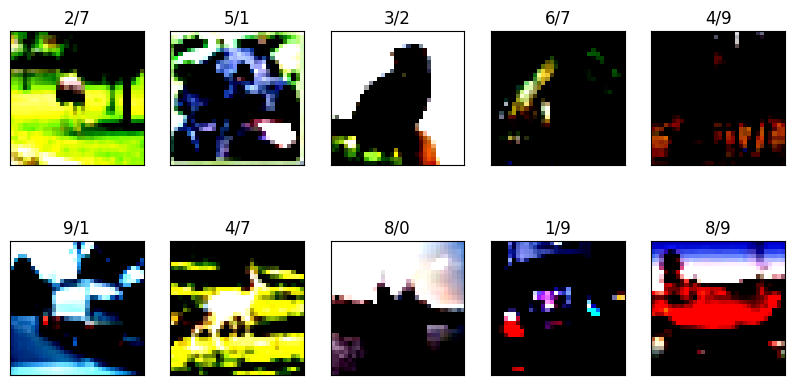

In [16]:
from torch.optim.lr_scheduler import StepLR
print('++++++++++++++++++++++++++  Layer Normalization Model +++++++++++++++++++++++++++++++++++++++++')

model = S8_model('LN').to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    # scheduler.step()
    test(model, device, test_loader)

print('++++++++++++++++++++++++++Misclassified Images Layer  Normalization Model +++++++++++++++++++++++++++++++++++++++++')
incorrect = get_incorrrect_predictions(model, test_loader, device)
plot_incorrect_predictions(incorrect, class_map)

++++++++++++++++++++++++++  Group Normalization Model +++++++++++++++++++++++++++++++++++++++++
EPOCH: 0


Loss=1.715871810913086 Batch_id=781 Accuracy=40.19: 100%|██████████| 782/782 [00:47<00:00, 16.47it/s]



Test set: Average loss: 1.4490, Accuracy: 4755/10000 (47.55%)

EPOCH: 1


Loss=1.6318632364273071 Batch_id=781 Accuracy=51.71: 100%|██████████| 782/782 [00:48<00:00, 16.28it/s]



Test set: Average loss: 1.2396, Accuracy: 5453/10000 (54.53%)

EPOCH: 2


Loss=1.2120579481124878 Batch_id=781 Accuracy=57.12: 100%|██████████| 782/782 [00:46<00:00, 16.79it/s]



Test set: Average loss: 1.0809, Accuracy: 6098/10000 (60.98%)

EPOCH: 3


Loss=1.0593732595443726 Batch_id=781 Accuracy=60.40: 100%|██████████| 782/782 [00:48<00:00, 15.97it/s]



Test set: Average loss: 1.0880, Accuracy: 6162/10000 (61.62%)

EPOCH: 4


Loss=1.2310755252838135 Batch_id=781 Accuracy=62.95: 100%|██████████| 782/782 [00:47<00:00, 16.56it/s]



Test set: Average loss: 1.0114, Accuracy: 6352/10000 (63.52%)

EPOCH: 5


Loss=1.3334007263183594 Batch_id=781 Accuracy=64.99: 100%|██████████| 782/782 [00:47<00:00, 16.50it/s]



Test set: Average loss: 0.9456, Accuracy: 6651/10000 (66.51%)

EPOCH: 6


Loss=0.8334394693374634 Batch_id=781 Accuracy=66.76: 100%|██████████| 782/782 [00:48<00:00, 16.11it/s]



Test set: Average loss: 0.9017, Accuracy: 6807/10000 (68.07%)

EPOCH: 7


Loss=0.7379766702651978 Batch_id=781 Accuracy=68.06: 100%|██████████| 782/782 [00:47<00:00, 16.35it/s]



Test set: Average loss: 0.9241, Accuracy: 6756/10000 (67.56%)

EPOCH: 8


Loss=0.7600147128105164 Batch_id=781 Accuracy=69.10: 100%|██████████| 782/782 [00:48<00:00, 16.11it/s]



Test set: Average loss: 0.8339, Accuracy: 7056/10000 (70.56%)

EPOCH: 9


Loss=0.5705125331878662 Batch_id=781 Accuracy=69.76: 100%|██████████| 782/782 [00:48<00:00, 16.08it/s]



Test set: Average loss: 0.8217, Accuracy: 7109/10000 (71.09%)

EPOCH: 10


Loss=0.5390984416007996 Batch_id=781 Accuracy=70.72: 100%|██████████| 782/782 [00:46<00:00, 16.71it/s]



Test set: Average loss: 0.8064, Accuracy: 7107/10000 (71.07%)

EPOCH: 11


Loss=0.5925275683403015 Batch_id=781 Accuracy=71.34: 100%|██████████| 782/782 [00:47<00:00, 16.46it/s]



Test set: Average loss: 0.8267, Accuracy: 7086/10000 (70.86%)

EPOCH: 12


Loss=0.22778187692165375 Batch_id=781 Accuracy=72.01: 100%|██████████| 782/782 [00:50<00:00, 15.63it/s]



Test set: Average loss: 0.8081, Accuracy: 7206/10000 (72.06%)

EPOCH: 13


Loss=0.7086950540542603 Batch_id=781 Accuracy=72.29: 100%|██████████| 782/782 [00:48<00:00, 16.23it/s]



Test set: Average loss: 0.7759, Accuracy: 7233/10000 (72.33%)

EPOCH: 14


Loss=0.9667683839797974 Batch_id=781 Accuracy=72.86: 100%|██████████| 782/782 [00:46<00:00, 16.67it/s]



Test set: Average loss: 0.8065, Accuracy: 7149/10000 (71.49%)

EPOCH: 15


Loss=0.8428485989570618 Batch_id=781 Accuracy=73.09: 100%|██████████| 782/782 [00:46<00:00, 16.68it/s]



Test set: Average loss: 0.7555, Accuracy: 7371/10000 (73.71%)

EPOCH: 16


Loss=1.0400371551513672 Batch_id=781 Accuracy=73.61: 100%|██████████| 782/782 [00:46<00:00, 16.74it/s]



Test set: Average loss: 0.7530, Accuracy: 7347/10000 (73.47%)

EPOCH: 17


Loss=1.197727084159851 Batch_id=781 Accuracy=73.75: 100%|██████████| 782/782 [00:48<00:00, 16.17it/s]



Test set: Average loss: 0.7393, Accuracy: 7383/10000 (73.83%)

EPOCH: 18


Loss=1.1546063423156738 Batch_id=781 Accuracy=74.23: 100%|██████████| 782/782 [00:48<00:00, 16.15it/s]



Test set: Average loss: 0.7453, Accuracy: 7381/10000 (73.81%)

EPOCH: 19


Loss=0.6277830004692078 Batch_id=781 Accuracy=74.61: 100%|██████████| 782/782 [00:48<00:00, 16.06it/s]



Test set: Average loss: 0.7243, Accuracy: 7475/10000 (74.75%)

++++++++++++++++++++++++++Misclassified Images Group Normalization Model +++++++++++++++++++++++++++++++++++++++++


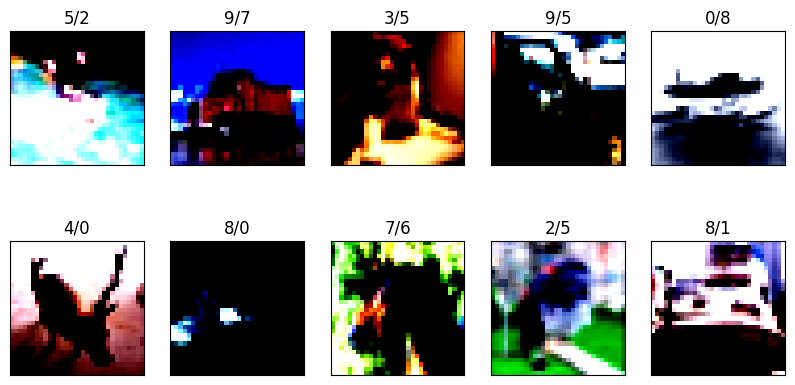

In [17]:
from torch.optim.lr_scheduler import StepLR
print('++++++++++++++++++++++++++  Group Normalization Model +++++++++++++++++++++++++++++++++++++++++')

model = S8_model('GN').to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    # scheduler.step()
    test(model, device, test_loader)

print('++++++++++++++++++++++++++Misclassified Images Group Normalization Model +++++++++++++++++++++++++++++++++++++++++')
incorrect = get_incorrrect_predictions(model, test_loader, device)
plot_incorrect_predictions(incorrect, class_map)